In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data1.csv")
df.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


In [5]:
df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]

In [6]:
x_data = df.drop(["class"],axis=1)
y=df["class"].values


In [7]:
#normalizasyon
x = (x_data - np.min(x_data)) // (np.max(x_data)-np.min(x_data))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [9]:
svm = SVC(random_state = 42)

In [10]:
svm.fit(X_train,y_train)

SVC(random_state=42)

In [11]:
svm_score = svm.score(X_test,y_test)
print(f"SVM Score: {svm_score} ")

SVM Score: 0.7446808510638298 


In [12]:
X,y = make_blobs(n_samples=50,centers=2,random_state=6) 

In [13]:
svm = SVC(kernel="linear")

In [14]:
svm.fit(X,y)

SVC(kernel='linear')

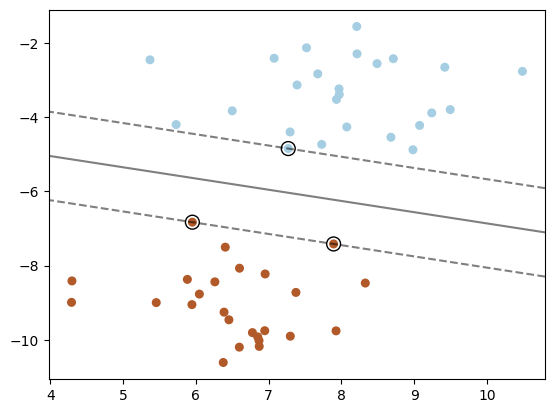

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xcoord = np.linspace(xlim[0], xlim[1], 30)
ycoord = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(xcoord, ycoord)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolor="none", edgecolor="k")

plt.show()
